In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialisation of functions

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from  numpy import cos,linspace,dot, real, pi,array
from numpy.linalg import multi_dot
from scipy.linalg import expm

sz=1/2*array([[1,0],[0,-1]])
sx=1/2*array([[0,1],[1,0]])
sy=1/2*array([[0,1j],[-1j,0]])

#from palettable.colorbrewer.qualitative import *
colors = mpl.cm.Set3
#colors = Set1_6.mpl_colors
from cycler import cycler

mpl.style.use('classic')
mpl.rc("figure", facecolor="white")
#mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = "Verdana"
mpl.rcParams['font.style'] = "italic"

In [6]:
def FidelityPI(dw0,dw1,w1,theta):
    t=theta/w1
    H=dw0*w1*sz+(w1+dw1*w1)*sx # hamiltonian in RWA
    U=expm(-1j*H*t)
    return abs((dot(U.conj().T,expm(-1j*theta*sx)))).trace()/2
    
dw0=0.1 #error in field/mw frequency
dw1=0.1 # error in mw amplitude
w1=2*pi #mw amplitude
theta=pi 
F=FidelityPI(dw0,dw1,w1,theta)
print(F)

0.9824970849813158


In [7]:
Errw0=linspace(-0.5,0.5,100)
Errw1=linspace(-0.5,0.5,100)
F2D=[]
for dw0 in Errw0:
    for dw1 in Errw1:
        F2D.append(FidelityPI(dw0,dw1,w1,theta)) 
F2D=array(F2D).reshape(len(Errw0),len(Errw1))

Text(0, 0.5, '$\\Delta \\omega_0 /\\omega_1$')

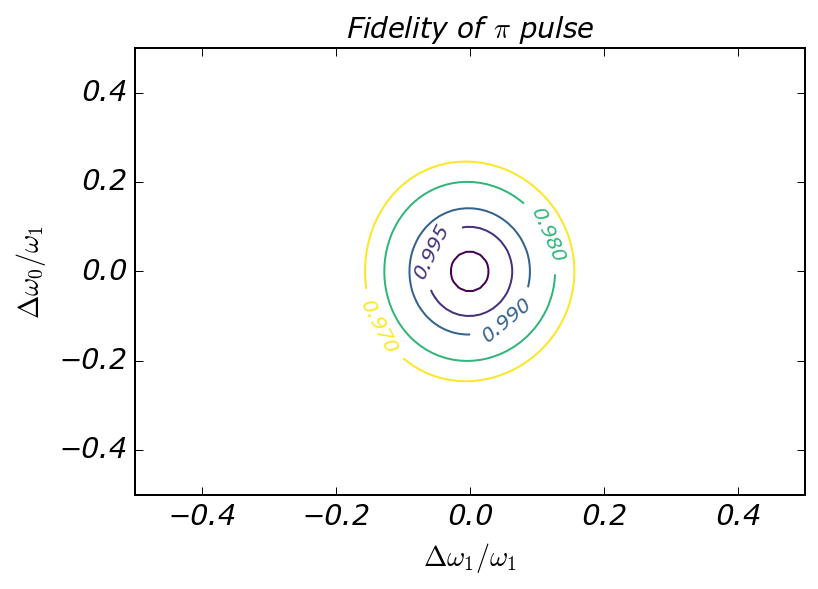

In [10]:
fig, ax = plt.subplots()
levels=[0.97,0.98,0.99,0.995,0.999]
CS = ax.contour(Errw1,Errw0,F2D,levels,cmap='viridis_r')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Fidelity of $\pi$ pulse')
ax.set_xlabel(r'$\Delta \omega_1 /\omega_1$')
ax.set_ylabel(r'$\Delta \omega_0 /\omega_1$')

In [107]:
def FidelityBB1(dw0,dw1,w1,theta):
    t=theta/w1
    H=dw0*w1*sz+(w1+dw1*w1)*sx # hamiltonian in RWA
    U=expm(-1j*H*t)
    return abs((dot(U.conj().T,expm(-1j*theta*sx)))).trace()/2
    
dw0=0.1 #error in field/mw frequency
dw1=0.1 # error in mw amplitude
w1=2*pi #mw amplitude
theta=pi 
F=FidelityPI(dw0,dw1,w1,theta)
print(F)

(30, 10)